In [25]:
from dataloader_classes import Lung_Train_Dataset, Lung_Test_Dataset, Lung_Val_Dataset
from small_functions import learning_curve,load_model, save_model
from threeclasses_classifier import Classifier, train_model

# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ld_train = Lung_Train_Dataset()
ld_train.describe()
print(len(ld_train))
im, class_oh = ld_train[5215]
print(im.shape)
print(im)
print(class_oh)

This is the training dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - train_normal, in folder ./dataset/train/normal/: 1341 images.
 - train_infected(non_covid), in folder ./dataset/train/infected/non-covid/: 2530 images.
 - train_infected(covid), in folder ./dataset/train/infected/covid/: 1345 images.

5216
torch.Size([1, 150, 150])
tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 0., 1.])


In [3]:
ld_test = Lung_Test_Dataset()
ld_test.describe()
print(len(ld_test))
im, class_oh = ld_test[476]
print(im.shape)
print(im)
print(class_oh)

This is the test dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 615 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - test_normal, in folder ./dataset/test/normal/: 234 images.
 - test_infected(non_covid), in folder ./dataset/test/infected/non-covid/: 242 images.
 - test_infected(covid), in folder ./dataset/test/infected/covid/: 139 images.

615
torch.Size([1, 150, 150])
tensor([[[0.2588, 0.3725, 0.4314,  ..., 0.1176, 0.1255, 0.1333],
         [0.3686, 0.4196, 0.4549,  ..., 0.1137, 0.1216, 0.1255],
         [0.4392, 0.4275, 0.4510,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.1647, 0.1765, 0.1412,  ..., 0.1569, 0.1569, 0.1569],
         [0.1647, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569],
         [0.1608, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569]]])
tensor([0., 0., 1.])


In [4]:
ld_val = Lung_Val_Dataset()
ld_val.describe()
print(len(ld_val))
im, class_oh = ld_val[15]
print(im.shape)
print(im)
print(class_oh)

This is the validation dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 25 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - val_normal, in folder ./dataset/val/normal/: 8 images.
 - val_infected(non_covid), in folder ./dataset/val/infected/non-covid: 8 images.
 - val_infected(covid), in folder ./dataset/val/infected/covid: 9 images.

25
torch.Size([1, 150, 150])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0157],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 1., 0.])


In [5]:
bs_val = 64

In [6]:
# creating dataloader object
train_loader = DataLoader(ld_train, batch_size = bs_val, shuffle = True)
print(train_loader)
test_loader = DataLoader(ld_test, batch_size = bs_val, shuffle = True)
print(test_loader)
val_loader = DataLoader(ld_val, batch_size = bs_val, shuffle = True)
print(val_loader)

In [7]:
# Typical mini-batch for loop on dataloader (train)
for k, v in enumerate(train_loader):
    print("-----")
    print(k)
    print(v[0])
    print(v[1])
    # Forced stop
    break
    #assert False, "Forced stop after one iteration of the for loop"

-----
0
tensor([[[[0.5255, 0.5373, 0.5098,  ..., 0.6980, 0.7333, 0.7647],
          [0.4980, 0.5216, 0.5216,  ..., 0.6980, 0.7059, 0.7294],
          [0.4941, 0.5137, 0.5137,  ..., 0.6902, 0.6863, 0.6980],
          ...,
          [0.0941, 0.0549, 0.0706,  ..., 0.1098, 0.1098, 0.1294],
          [0.1725, 0.0902, 0.0706,  ..., 0.1137, 0.1373, 0.1882],
          [0.2706, 0.1412, 0.0824,  ..., 0.1255, 0.1804, 0.2745]]],


        [[[0.1882, 0.1373, 0.3020,  ..., 0.2118, 0.1922, 0.1765],
          [0.1882, 0.1843, 0.2392,  ..., 0.2275, 0.2157, 0.2039],
          [0.2196, 0.2627, 0.2275,  ..., 0.2392, 0.2314, 0.2235],
          ...,
          [0.0471, 0.0471, 0.0431,  ..., 0.0275, 0.0275, 0.0275],
          [0.0471, 0.0471, 0.0431,  ..., 0.0275, 0.0275, 0.0275],
          [0.0471, 0.0471, 0.0431,  ..., 0.0275, 0.0275, 0.0275]]],


        [[[0.2941, 0.3529, 0.3490,  ..., 0.5569, 0.5529, 0.5608],
          [0.3137, 0.3647, 0.3490,  ..., 0.5490, 0.5608, 0.5843],
          [0.2588, 0.2941, 0.2

Testing of the dataloader

Train 3-classes clasifier

In [26]:
# Define loss function for training 
loss_function=nn.NLLLoss()
# Initialise model 
model=Classifier()
# Train model
model=train_model(model,train_loader,test_loader,epochs=1,loss_function)

0 ----------------------
[tensor(0.3750)]
1 ----------------------
[tensor(0.3750), tensor(0.2500)]
2 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438)]
3 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906)]
4 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906), tensor(0.4688)]
5 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906), tensor(0.4688), tensor(0.4375)]
6 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906), tensor(0.4688), tensor(0.4375), tensor(0.3906)]
7 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906), tensor(0.4688), tensor(0.4375), tensor(0.3906), tensor(0.3438)]
8 ----------------------
[tensor(0.3750), tensor(0.2500), tensor(0.3438), tensor(0.3906), tensor(0.4688), tensor(0.4375), tensor(0.3906), tensor(0.3438), tensor(0.2344)]
9 ----------------------
[tensor(0.3750), tens

In [28]:
# Save trained model to model folder
model_name='test'
path='./model/'+model_name+'.pt'
save_model(model,path)


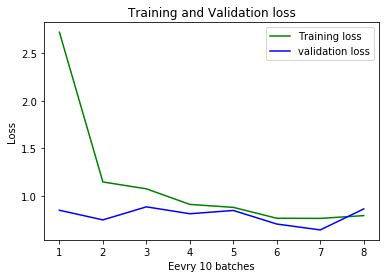

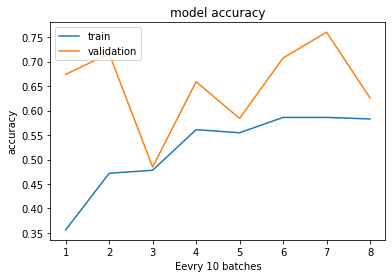

In [33]:
# Plot learning curve and save to folder learningCurve
loss_fig,acc_fig=learning_curve(model.history)
loss_fig.savefig('./learningCurve/loss.jpg')
acc_fig.savefig('./learningCurve/acc.jpg')

In [34]:
# Load model
test_model=load_model('./model/test.pt')
test_model

Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=82944, out_features=3, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax()
)